<center>
<h1><b>Lab 1</b></h1>
<h1>PHYS 580 - Computational Physics</h1>
<h2>Professor Molnar</h2>
</br>
<h3><b>Ethan Knox</b></h3>
<h3><b>September 4, 2020</b></h3>
</center>

## Imports

In [145]:
import numpy as np
from matplotlib import pyplot as plt

## Differential Equation

$$\frac{dN}{dt}=-\frac{N}{\tau}$$

In [152]:
def f(y, x, tau = 1):
    return - y / tau

## Numerical Methods
Denoting: $\Delta x = x_{i+1}-x_i$

### Euler Method
$$y_{i+1} = y_i + f\left(y_i, x_i\right)\Delta x$$

In [146]:
def euler(f, y0, x, *args):
    y = y0 * np.ones_like(x)

    for i in range(len(x) - 1):
        dx = x[i + 1] - x[i]
        k1 = f(y[i], x[i], *args) * dx
        y[i + 1] = y[i] + k1
    return y

### RK2 Method
$$
\begin{align}k_1 &= f\left(y_i, x_i\right)\Delta x\\
             k_2 &= f\left(y_i + k_1, x_i + \delta x\right)\Delta x\\
\end{align}
$$
$$y_{i+1} = y_i + \frac{1}{2}\left(k_1 + k_2\right)$$

In [147]:
def rk2(f, y0, x, *args):
    y = y0 * np.ones_like(x)

    for i in range(len(x) - 1):
        dx = x[i + 1] - x[i]
        k1 = f(y[i], x[i], *args) * dx
        k2 = f(y[i] + k1, x[i] + dx, *args) * dx
        y[i + 1] = y[i] + 0.5 * (k1 + k2)
    return y

### RK4 Method
$$
\begin{align}k_1 &= \Delta x f\left(y_i, x_i\right)\\
             k_2 &= \Delta x f\left(y_i + \frac{k_1}{2}, x_i + \frac{\Delta x}{2}\right)\\
             k_3 &= \Delta x f\left(y_i + \frac{k_2}{2}, x_i + \frac{\Delta x}{2}\right)\\
             k_4 &= \Delta x f\left(y_i + k_3, x_i + \Delta x\right)\\
\end{align}
$$
$$y_{i + 1} = y_i + \frac{1}{6}\left(k_1 + 2\left(k_2 + k_3\right) + k_4\right)$$

In [148]:
def rk4(f, y0, x, *args):
    y = y0 * np.ones_like(x)
    
    for i in range(len(x) - 1):
        dx = x[i + 1] - x[i]
        k1 = f(y[i], x[i], *args) * dx
        k2 = f(y[i] + 0.5 * k1, x[i] + 0.5 * dx, *args) * dx
        k3 = f(y[i] + 0.5 * k2, x[i] + 0.5 * dx, *args) * dx
        k4 = f(y[i] + k3, x[i] + dx, *args) * dx
        y[i + 1] = y[i] + (k1 + 2 * (k2 + k3) + k4) / 6
    return y

## Analytical Solution

$$N\left(t\right)=N_0e^{\frac{-x}{\tau}}$$

In [149]:
def nexact(x, tau = 1, N0 = 1000):
    return N0 * np.exp(-x / tau)

## Error
### Global

In [150]:
def global_error(calculated, exact):
    return np.cumsum(calculated - exact)

### Local

In [151]:
def local_error(y_exact, y_approx, x):
    error = np.zeros_like(x)
    for i in np.arange(1, len(error)):
        error[i-1] = y_exact(x[i]) - y_exact(x[i-1]) - (y_approx[i] - y_approx[i-1])
    return error

## Code

#### Parameters

In [153]:
N0 = 1000  # Initial Condition
tau = 1  # Rate Parameter

t_i = 0  # Initial Time
t_f = 5 * tau  # Final Time

ratios = 1.0e-1*np.asarray([0.05, 0.2, 0.5, 1.0, 1.5])
labels = [rf'$\Delta t/\tau = {ratio:0.4f}$' for ratio in ratios]

#### Accumulate Data

In [154]:
t = [np.arange(t_i, t_f, ratio * tau) for ratio in ratios]

N_euler = [euler(f, N0, t_, tau) for t_ in t]
N_rk2 = [rk2(f, N0, t_, tau) for t_ in t]
N_rk4 = [rk4(f, N0, t_, tau) for t_ in t]

#### Plotting

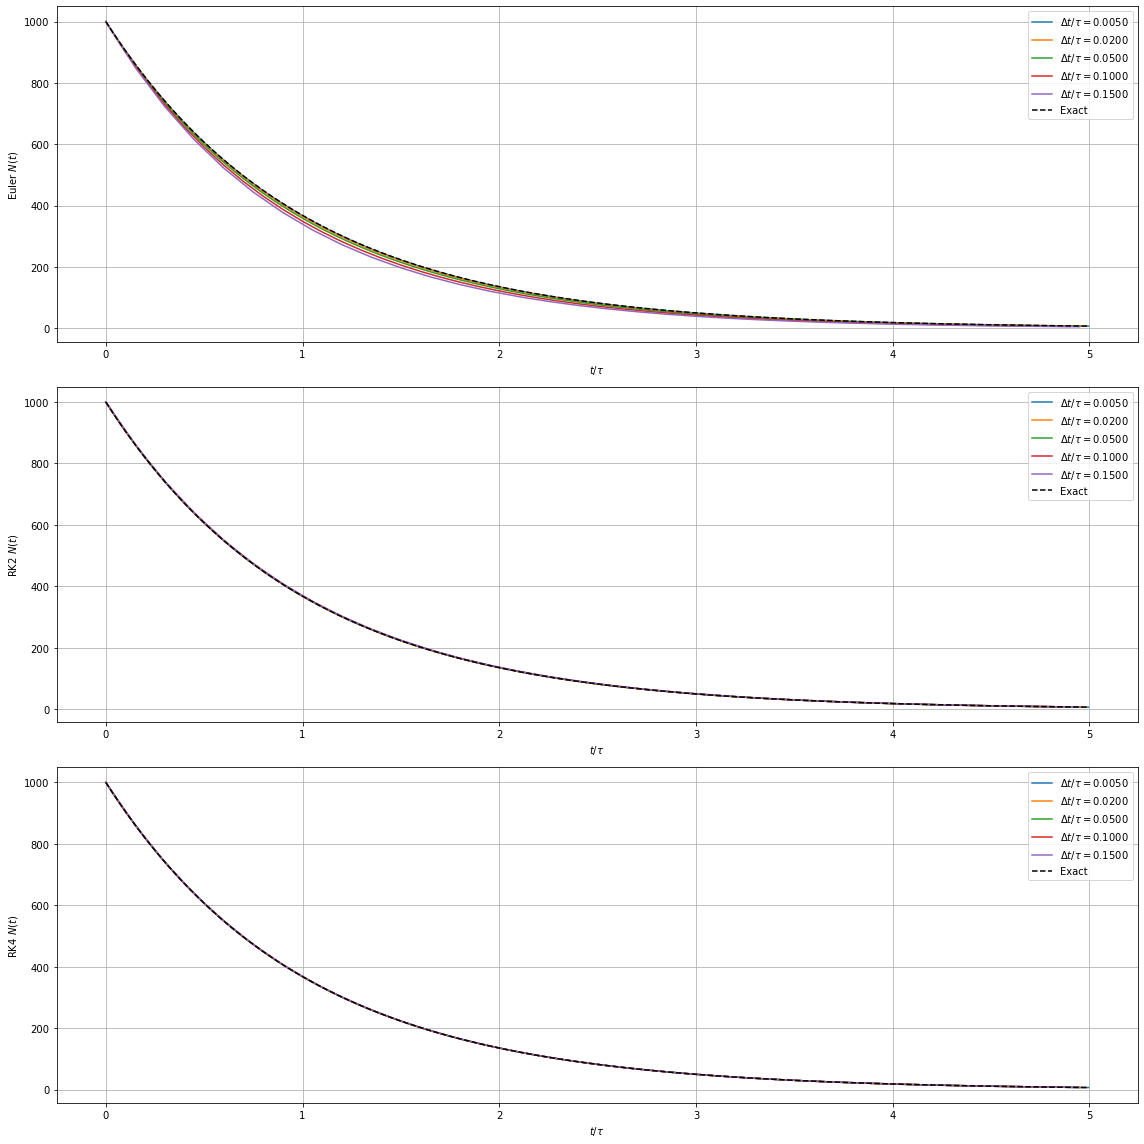

In [156]:
fig1, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,16))

for i, label in enumerate(labels):
    ax1.plot(t[i] / tau, N_euler[i], label=label)
    ax2.plot(t[i] / tau, N_rk2[i], label=label)
    ax3.plot(t[i] / tau, N_rk4[i], label=label)

for ax in (ax1, ax2, ax3):
    ax.plot(t[0] / tau, nexact(t[0], tau, N0), c='k',ls='--', label="Exact")
    ax.set_xlabel(r'$t/\tau$')
    ax.legend()
    ax.grid()

ax1.set_ylabel(r'Euler $N(t)$')
ax2.set_ylabel(r'RK2 $N(t)$')
ax3.set_ylabel(r'RK4 $N(t)$')

plt.tight_layout()
plt.savefig("Lab1_results.png")

In [157]:
plt.cla()
plt.clf()

<Figure size 432x288 with 0 Axes>

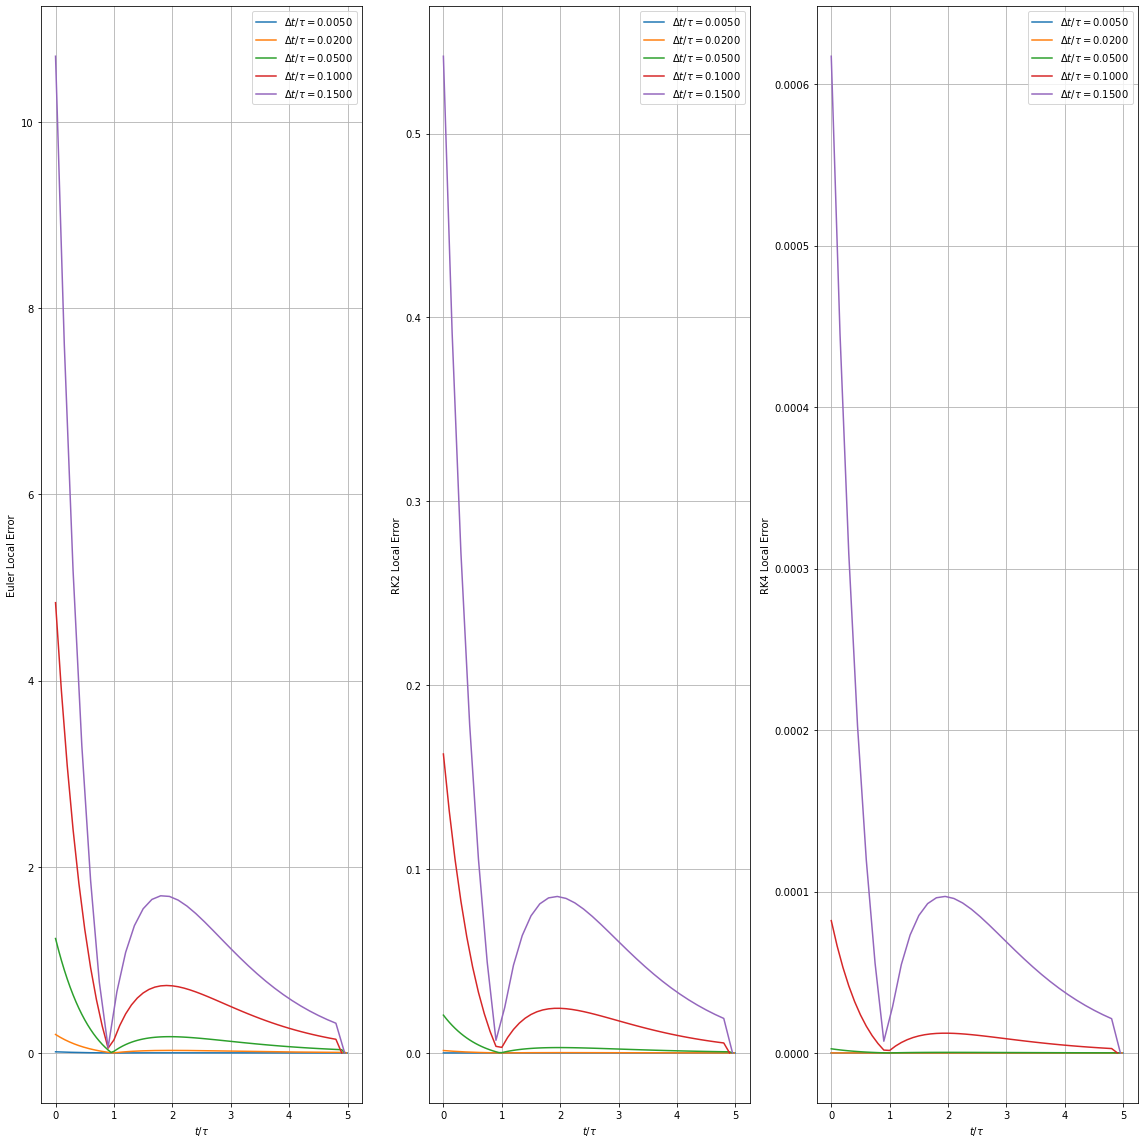

In [158]:
fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,16))

for i, label in enumerate(labels):
    ax1.plot(t[i] / tau, np.absolute(local_error(nexact, N_euler[i], t[i]/tau)), label=label)
    ax2.plot(t[i] / tau, np.absolute(local_error(nexact, N_rk2[i], t[i]/tau)), label=label)
    ax3.plot(t[i] / tau, np.absolute(local_error(nexact, N_rk4[i], t[i]/tau)), label=label)

for ax in (ax1, ax2, ax3):
    ax.set_xlabel(r'$t/\tau$')
    ax.legend()
    ax.grid()

ax1.set_ylabel("Euler Local Error")
ax2.set_ylabel("RK2 Local Error")
ax3.set_ylabel("RK4 Local Error")

plt.tight_layout()
plt.savefig("Lab1_local_error.png")

In [159]:
plt.cla()
plt.clf()

<Figure size 432x288 with 0 Axes>

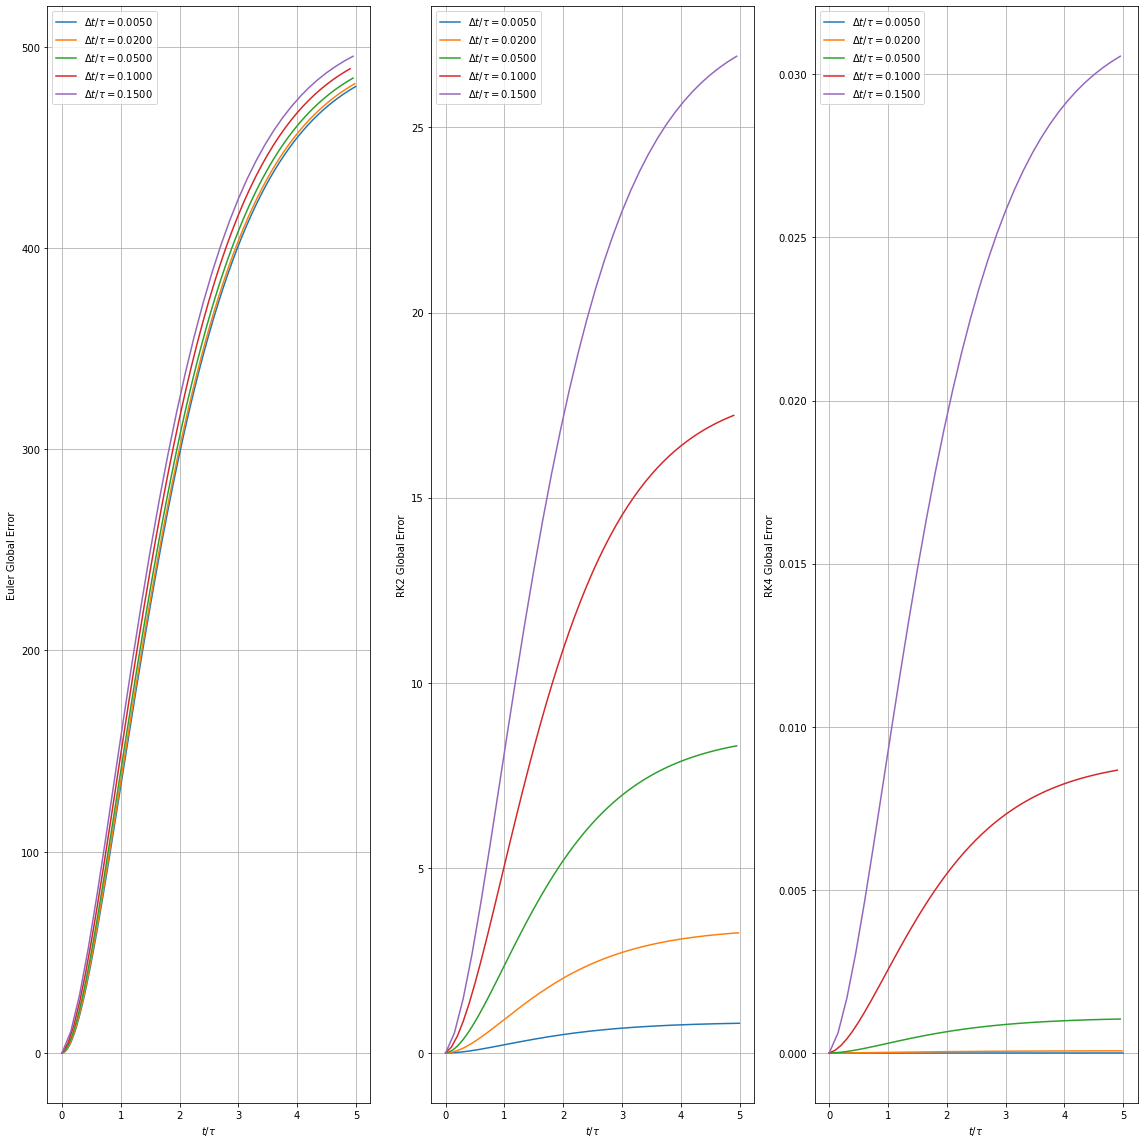

In [160]:
fig3, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,16))

for i, label in enumerate(labels):
    ax1.plot(t[i] / tau, np.absolute(global_error(N_euler[i], nexact(t[i], tau, N0))), label=label)
    ax2.plot(t[i] / tau, np.absolute(global_error(N_rk2[i], nexact(t[i], tau, N0))), label=label)
    ax3.plot(t[i] / tau, np.absolute(global_error(N_rk4[i], nexact(t[i], tau, N0))), label=label)

for ax in (ax1, ax2, ax3):
    ax.set_xlabel(r'$t/\tau$')
    ax.legend()
    ax.grid()

ax1.set_ylabel("Euler Global Error")
ax2.set_ylabel("RK2 Global Error")
ax3.set_ylabel("RK4 Global Error")

plt.tight_layout()
plt.savefig("Lab1_global_error.png")

## Conclusion

It's very apparent that in both local and global errors, both Runge-Kutta methods outperformed Euler's method for a given timestep. Further, RK4 outperformed RK2 in the same manner.